In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
target = "charges"

In [4]:
X = df.drop(columns=target)

In [5]:
X.head()

,age,gender,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [6]:
sorted(X.region.unique())

['northeast', 'northwest', 'southeast', 'southwest']

In [7]:
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
age         1338 non-null int64
gender      1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [9]:
y = df[target]

In [10]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [11]:
from sklearn import preprocessing, model_selection

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_dummy, y , test_size = 0.3, random_state = 1)

In [13]:
import numpy as np

In [14]:
np.random.seed(111)
np.random.randint(0, 10, 5)

array([4, 4, 4, 6, 3])

In [15]:
from sklearn import linear_model

In [16]:
est = linear_model.LinearRegression()
est.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
est.intercept_

-11039.23841856155

In [18]:
y_test_pred = est.predict(X_test)
y_train_pred = est.predict(X_train)

In [19]:
summary = pd.DataFrame({"actual": y_test, "prediction": y_test_pred})

In [20]:
summary["error"] = summary.prediction - summary.actual

In [21]:
summary.head()

,actual,prediction,error
559,1646.4297,4610.315541,2963.885841
1087,11353.2276,12887.893880,1534.666280
1020,8798.5930,12573.948752,3775.355752
460,10381.4787,13197.836626,2816.357926
802,2103.0800,629.337182,-1473.742818


In [22]:
mse = (summary.error ** 2).mean()

In [23]:
mse

36761456.352013245

In [24]:
rmse

NameError: name 'rmse' is not defined

In [25]:
sse = (summary.error ** 2).sum()

In [26]:
sst = ((y_train.mean() - y_test) ** 2).sum()

In [27]:
r2 = 1 - sse/sst
r2

0.7405997304511027

In [28]:
from sklearn import metrics

In [29]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927212

In [30]:
sst = ((y_test.mean() - y_test) ** 2).sum()

In [31]:
r2 = 1 - sse/sst
r2

0.7405989316927213

In [32]:
import matplotlib.pyplot as plt

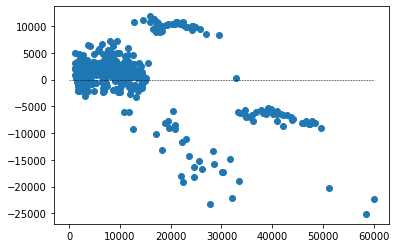

In [33]:
plt.scatter(summary.actual, summary.error)
plt.hlines([0], 0, 60000, linestyles="--", lw = 0.5)

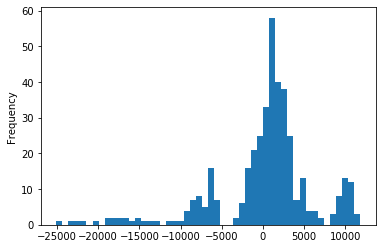

In [34]:
summary.error.plot.hist(bins = 50)

In [35]:
print("r2 training: ", metrics.r2_score(y_train, y_train_pred))
print("r2 test: ", metrics.r2_score(y_test, y_test_pred))

print("rmse train: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("rmse test: ", metrics.mean_squared_error(y_test, y_test_pred)** 0.5)

r2 training:  0.7545557492633161
r2 test:  0.7405989316927212
rmse train:  6039.6018713245385
rmse test:  6063.12265685045


In [36]:
target = "charges"

X = df.drop(columns=target)
X_dummy = pd.get_dummies(X, drop_first=True)

y = df[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_dummy, y , test_size = 0.3, random_state =1)

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_test_pred = est.predict(X_test)
y_train_pred = est.predict(X_train)

print("r2 training: ", metrics.r2_score(y_train, y_train_pred))
print("r2 test: ", metrics.r2_score(y_test, y_test_pred))

print("rmse train: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("rmse test: ", metrics.mean_squared_error(y_test, y_test_pred)** 0.5)




r2 training:  0.7545557492633161
r2 test:  0.7405989316927211
rmse train:  6039.6018713245385
rmse test:  6063.122656850451


In [37]:
pd.DataFrame({"feature": X_dummy.columns, "coeff ":  est.coef_})

,feature,coeff
0,age,3528.982731
1,bmi,1961.655208
2,children,421.550164
3,gender_male,-141.359110
4,smoker_yes,9733.786883
5,region_northwest,-129.545886
6,region_southeast,-414.541483
7,region_southwest,-379.095344


In [38]:
X_dummy

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [39]:
target = "charges"

X = df.drop(columns=target)
X["high_bmi"] = np.where(X.bmi>33, 1, 0)
X["high_bmi"] = np.where(X.age>60, 1, 0)
X_dummy = pd.get_dummies(X, drop_first=True)

y = np.log(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_dummy, y , test_size = 0.3, random_state =1)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)


scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_test_pred = est.predict(X_test)
y_train_pred = est.predict(X_train)

print("r2 training: ", metrics.r2_score(y_train, y_train_pred))
print("r2 test: ", metrics.r2_score(y_test, y_test_pred))

print("rmse train: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("rmse test: ", metrics.mean_squared_error(y_test, y_test_pred)** 0.5)




r2 training:  0.8318619149405777
r2 test:  0.8673224620900684
rmse train:  0.37725515061860054
rmse test:  0.3340755865525741


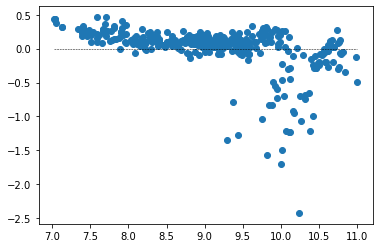

In [40]:
plt.scatter(y_test, y_test_pred - y_test)
plt.hlines([0], y_test.min(), y_test.max(), linestyles="--", lw = 0.5)

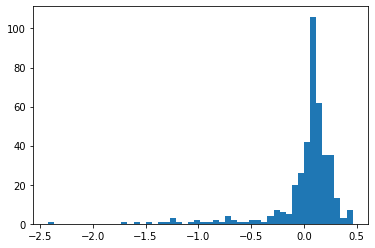

In [41]:
plt.hist(y_test_pred - y_test, bins = 50);

In [42]:
np.random.seed(1)
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
a = np.random.randint(0, 10, (4, 3))
poly.fit_transform(a)

array([[ 5.,  8.,  9., 25., 40., 45., 64., 72., 81.],
       [ 5.,  0.,  0., 25.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  7.,  6.,  1.,  7.,  6., 49., 42., 36.],
       [ 9.,  2.,  4., 81., 18., 36.,  4.,  8., 16.]])

In [43]:
a

array([[5, 8, 9],
       [5, 0, 0],
       [1, 7, 6],
       [9, 2, 4]])

In [44]:
from sklearn import pipeline

In [46]:
target = "charges"

X = df.drop(columns=target)
X["high_bmi"] = np.where(X.bmi>33, 1, 0)
X["high_bmi"] = np.where(X.age>60, 1, 0)
X_dummy = pd.get_dummies(X, drop_first=True)

y = np.log(df[target])

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X_dummy, y , test_size = 0.3, random_state =1235674)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])


pipe.fit(X_train, y_train)

y_test_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

print("r2 training: ", metrics.r2_score(y_train, y_train_pred))
print("r2 test: ", metrics.r2_score(y_test, y_test_pred))

print("rmse train: ", metrics.mean_squared_error(y_train, y_train_pred) ** 0.5)
print("rmse test: ", metrics.mean_squared_error(y_test, y_test_pred)** 0.5)


r2 training:  0.848055304840746
r2 test:  0.829374102275404
rmse train:  0.35681738775713495
rmse test:  0.38317424502744196


In [49]:
scores = model_selection.cross_val_score(pipe, X_train
                        , y_train, cv=5, scoring = "r2")

In [50]:
scores

array([0.87536682, 0.90795288, 0.76910075, 0.77609087, 0.85544986])

In [52]:
np.mean(scores), np.std(scores)

(0.8367922331737786, 0.055075831642602595)

In [53]:
scores = model_selection.cross_val_score(pipe, X_train
                        , y_train, cv=10, scoring = "r2")
np.mean(scores), np.std(scores)

(0.8333448500481737, 0.06880203078527254)

In [55]:
10 ** np.linspace(-3, 0, 10)

array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])

In [57]:
pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.ElasticNet())
])


param_grid = {
    "est__l1_ratio": np.linspace(0, 1, 10),
    "est__alpha": 10 ** np.linspace(-3, 0, 10)
}

gsearch = model_selection.GridSearchCV(pipe, param_grid
            , cv = 5, verbose = True, n_jobs= 8 )

gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0875199618934488, tolerance: 0.07843001994623755
  positive)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('est',
                                        ElasticNet(alpha=1.0, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.5, max_iter=1000,
                    

In [58]:
gsearch.best_params_

{'est__alpha': 0.001, 'est__l1_ratio': 0.6666666666666666}

In [60]:
gsearch.best_estimator_.score(X_test, y_test)

0.8297512237321147

In [61]:
gsearch.score(X_test, y_test)

0.8297512237321147

In [62]:
import pickle

In [63]:
with open("/tmp/model.pickle", "wb") as f:
    pickle.dump(gsearch, f)

In [66]:
!ls -lh /tmp/model.pickle

-rw-r--r--  1 abasar  wheel    17K Sep 25 10:30 /tmp/model.pickle


In [67]:
with open("/tmp/model.pickle", "rb") as f:
    model = pickle.load(f)

In [68]:
model.score(X_test, y_test)

0.8297512237321147

In [70]:
np.power(np.e, model.predict(X_test))

array([12310.21489756, 17221.31507228,  1790.98638129, 14986.32728243,
       10008.67182877,  8009.168756  , 22026.15840593,  8547.48560879,
        3495.87461319, 13787.60831247, 11852.55150884, 12447.49014766,
       26596.09749699, 15146.96672846,  8092.87313326,  4785.81606615,
        6749.94721436, 11023.60350996,  5758.47771458,  8445.40432614,
        7471.72458762, 12478.45289853,  6049.9169321 ,  3470.99250329,
       32639.00154624,  3496.32025379,  2507.94753374, 10513.876596  ,
       22239.47561225,  2929.50994652,  3415.04807403,  5242.90201782,
        2144.4574002 ,  4508.78719468, 20002.0483428 , 13634.32033893,
        9902.75460681, 38863.1150282 , 14947.58498442,  3928.07236126,
        9164.37664895,  3643.05328048,  6173.22225952,  9692.33195024,
        8000.69308468, 22163.1018122 , 41771.46339537,  5428.75545207,
       31770.08388864,  3022.59503346, 30402.64263487, 39546.3632527 ,
       13818.16968745,  4323.51790191,  4443.32206041,  5489.64419863,
      

In [77]:
[(c, str(df.dtypes[c]))  for c in df.dtypes.index]

[('age', 'int64'),
 ('gender', 'object'),
 ('bmi', 'float64'),
 ('children', 'int64'),
 ('smoker', 'object'),
 ('region', 'object'),
 ('charges', 'float64')]

In [80]:
cat_features = [c  for c in df.dtypes.index if str(df.dtypes[c]) == "object"]

['gender', 'smoker', 'region']

In [81]:
num_features = [c  for c in df.dtypes.index if str(df.dtypes[c]) != "object"]

In [82]:
num_features

['age', 'bmi', 'children', 'charges']